In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline

import time
start = time.clock()

C:\Users\VILTU\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [2]:
### Data preparation

# load datasets
data_train = pd.read_csv(r"C:\Users\VILTU\Desktop\ViCaDE-2 (H.A.R.)\train.csv")
data_test = pd.read_csv(r"C:\Users\VILTU\Desktop\ViCaDE-2 (H.A.R.)\test.csv")


# Merge training and test data
data = pd.concat((data_train, data_test), axis = 0)
print("Dataset size: ", data.shape)


# Data distribution per activity
data_distribution = pd.crosstab(index = data['Activity'], columns = 'Total_Samples')
print("\nSamples per activity: \n\n", data_distribution)

Dataset size:  (10299, 563)

Samples per activity: 

 col_0               Total_Samples
Activity                         
LAYING                       1944
SITTING                      1777
STANDING                     1906
WALKING                      1722
WALKING_DOWNSTAIRS           1406
WALKING_UPSTAIRS             1544


In [3]:
### Data Preprocessing

# is there any missing value in dataset
data_feature = data.iloc[:,0:561]
print("Is there any missing value in dataset: ", data_feature.isnull().values.any())
data_feature = np.asarray(data_feature)

# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_feature)

#Separate Label and Features
data_feature = pd.DataFrame(data.drop(['subject', 'Activity'], axis = 1))
data_label = data.loc[:,'Activity']

# separate data into 70%, 30%
train_feature, test_feature, train_label, test_label = train_test_split(data_feature, data_label, test_size=0.30)
print("\nTraining_features size: ",train_feature.shape)
print("Training_label size: ", train_label.shape)
print("\nTest_features size: ",test_feature.shape)
print("Test_label size: ", test_label.shape)

Is there any missing value in dataset:  False

Training_features size:  (7209, 561)
Training_label size:  (7209,)

Test_features size:  (3090, 561)
Test_label size:  (3090,)


<function matplotlib.pyplot.show(*args, **kw)>

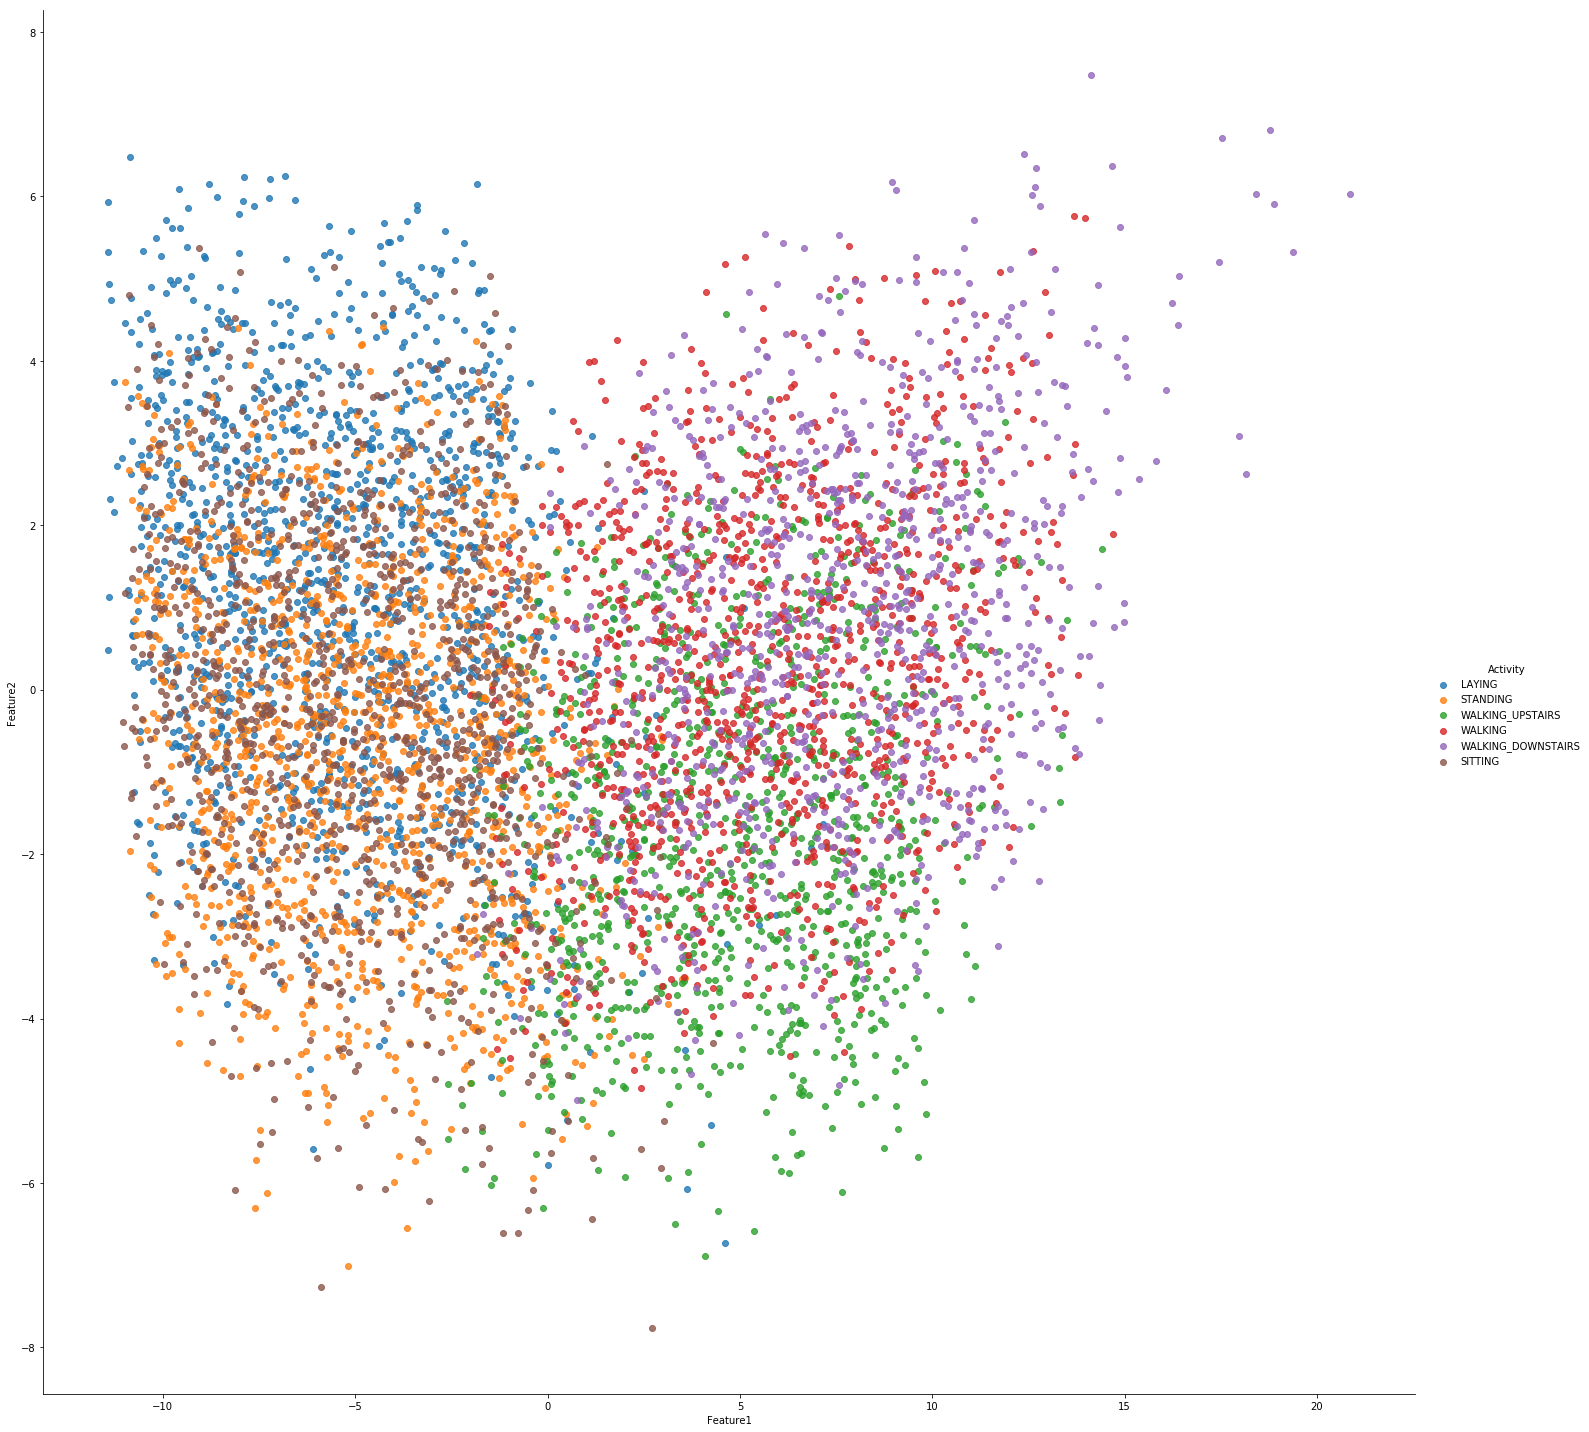

In [4]:
### Data Visualization

# plot graph visualize data
from sklearn.decomposition import PCA
pca = PCA(2)
viltu_visual = pca.fit_transform(train_feature)
viltu_visual = pd.DataFrame(viltu_visual, columns = ['Feature1', 'Feature2'])
viltu_visual_activity = np.asarray(train_label)
viltu_visual['Activity'] = viltu_visual_activity
sns.lmplot(x='Feature1', y='Feature2', data=viltu_visual, hue='Activity', fit_reg=False, x_jitter=5.0, y_jitter=3.0, height=20)
matplotlib.rcParams.update({'font.size': 10})
plt.show

#           Train with SVM:-

In [5]:
# Train model with different and calculate accuracy
svc_linear = SVC(kernel = 'linear', C=1.0)
svc_linear.fit(train_feature, train_label)
label_predicted_linear = svc_linear.predict(test_feature)
print("Confusion matrix using LINEAR_KERNEL:\n", confusion_matrix(test_label, label_predicted_linear))

svc_rbf = SVC(kernel = 'rbf', gamma = 0.05, C=1.0)
svc_rbf.fit(train_feature, train_label)
label_predicted_rbf = svc_rbf.predict(test_feature)
print("\nConfusion matrix using RBF_KERNEL:\n", confusion_matrix(test_label, label_predicted_rbf))

svc_sigmoid = SVC(kernel = 'sigmoid', C=1.0)
svc_sigmoid.fit(train_feature, train_label)
label_predicted_sigmoid = svc_sigmoid.predict(test_feature)
print("\nConfusion matrix using SIGMOID_KERNEL:\n", confusion_matrix(test_label, label_predicted_sigmoid))

svc_poly = SVC(kernel = 'poly', degree = 3, C=1.0)
svc_poly.fit(train_feature, train_label)
label_predicted_poly = svc_poly.predict(test_feature)
print("\nConfusion matrix using POLYNOMIAL_KERNEL:\n", confusion_matrix(test_label, label_predicted_poly))

Confusion matrix using LINEAR_KERNEL:
 [[574   0   0   0   0   0]
 [  0 522  15   0   0   0]
 [  0  30 554   0   0   0]
 [  0   0   0 516   0   0]
 [  0   0   0   0 398   1]
 [  0   0   0   2   0 478]]

Confusion matrix using RBF_KERNEL:
 [[574   0   0   0   0   0]
 [  0 524  13   0   0   0]
 [  0  25 559   0   0   0]
 [  0   0   0 515   1   0]
 [  0   0   0   1 398   0]
 [  0   0   0   1   0 479]]


C:\Users\VILTU\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Confusion matrix using SIGMOID_KERNEL:
 [[574   0   0   0   0   0]
 [  5 427 105   0   0   0]
 [  0  71 513   0   0   0]
 [  0   0   0 500   2  14]
 [  0   0   0   7 368  24]
 [  0   0   0   6   8 466]]


C:\Users\VILTU\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Confusion matrix using POLYNOMIAL_KERNEL:
 [[574   0   0   0   0   0]
 [  3 460  74   0   0   0]
 [  0  64 520   0   0   0]
 [  0   0   0 494   6  16]
 [  0   0   0  12 358  29]
 [  0   0   0  19  19 442]]


In [6]:
# Accuracy
accuracy_linear = svc_linear.score(test_feature, test_label)
accuracy_rbf = svc_rbf.score(test_feature, test_label)
accuracy_sigmoid = svc_sigmoid.score(test_feature, test_label)
accuracy_poly = svc_poly.score(test_feature, test_label)
print("Accuracy with LINEAR_KERNEL: ", accuracy_linear*100)
print("Accuracy with RBF_KERNEL: ", accuracy_rbf*100)
print("Accuracy with SIGMOID_KERNEL: ", accuracy_sigmoid*100)
print("Accuracy with POLY_KERNEL: ", accuracy_poly*100)

Accuracy with LINEAR_KERNEL:  98.44660194174757
Accuracy with RBF_KERNEL:  98.67313915857605
Accuracy with SIGMOID_KERNEL:  92.16828478964402
Accuracy with POLY_KERNEL:  92.16828478964402


# Train with Logistic Regression:-

In [7]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(train_feature, train_label)

Logistic_accuracy = LogReg.score(test_feature, test_label)
Logistic_pred = LogReg.predict(test_feature)
print("\n\nConfusion Matrix of test set: \n", confusion_matrix(test_label, Logistic_pred))
print("\nAccuracy with LOGISTIC_REGRESSION on Test set: ", Logistic_accuracy*100)

C:\Users\VILTU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VILTU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)




Confusion Matrix of test set: 
 [[574   0   0   0   0   0]
 [  0 514  23   0   0   0]
 [  0  33 551   0   0   0]
 [  0   0   0 516   0   0]
 [  0   0   0   1 398   0]
 [  0   0   0   1   0 479]]

Accuracy with LOGISTIC_REGRESSION on Test set:  98.12297734627832


In [8]:
# Random predictions

print("\tPridicted Activity\t\t\t\tActual Activity\n")

for i in range(1,2501):
    if i%250==0:
        p = LogReg.predict([test_feature.iloc[i,:]])
        print(p, end=" ")
        print("\t\t\t\t\t", test_label.iloc[i],"\n")

	Pridicted Activity				Actual Activity

['LAYING'] 					 LAYING 

['SITTING'] 					 SITTING 

['LAYING'] 					 LAYING 

['WALKING_DOWNSTAIRS'] 					 WALKING_DOWNSTAIRS 

['WALKING_UPSTAIRS'] 					 WALKING_UPSTAIRS 

['LAYING'] 					 LAYING 

['LAYING'] 					 LAYING 

['LAYING'] 					 LAYING 

['WALKING_DOWNSTAIRS'] 					 WALKING_DOWNSTAIRS 

['WALKING_UPSTAIRS'] 					 WALKING_UPSTAIRS 



In [9]:
end = time.clock()
print("\n\nTotal running time: ", end-start,"sec.")



Total running time:  180.84124070000001 sec.


C:\Users\VILTU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
